# matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 15})

#### Zadanie 1

Stwórz wykres liniowy przedstawiając następujące wartości:

- f(1) = 2
- f(2) = 3
- f(3) = 1
- f(4) = 2

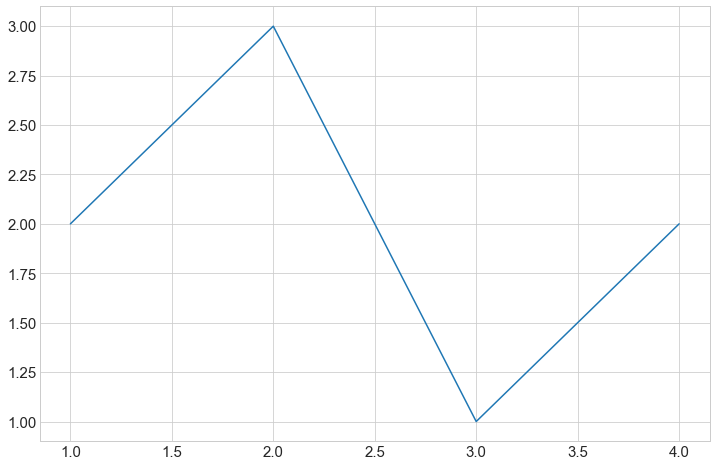

In [2]:
plt.plot([1, 2, 3, 4], [2, 3, 1, 2])

#### Zadanie 2

Zmienna `x` zawiera 1000 wygenerowanych równo rozłożonych wartości pomiędzy -10 a 10.

Stwórz wykres przedstawiający wartości `f(x) = sin(x)` oraz `f(x) = cos(x)`. Sformatuj wykres:

- widoczny zakres osi X powinien być od -15 do 15
- widoczny zakres osi Y powinien być od -2 do 2
- nadaj tytuł wykresu: "Wykres sin i cos"
- podpisz osie X i Y, po prostu nazwami "x" i "y"
- wyświetl legendę wykresu zawierającą nazwy serii ("sin(x)" oraz "cos(x)")
- wykres `cos(x)` narysuj linią przerywaną

In [3]:
x = np.linspace(-10, 10, 100)

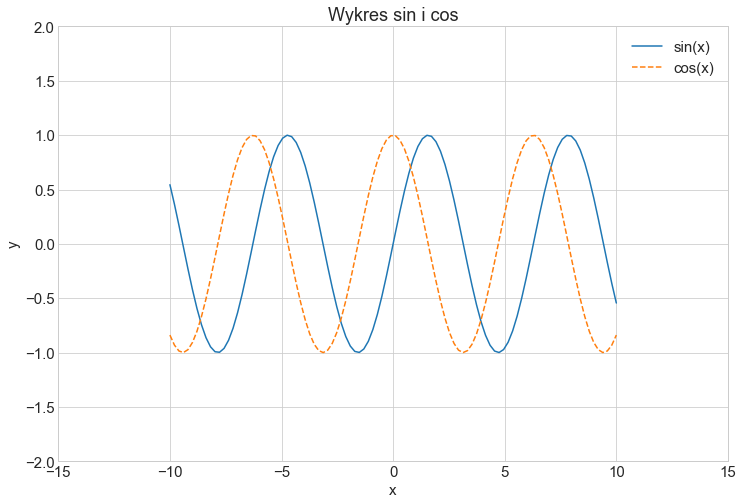

In [4]:
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), '--', label='cos(x)')
plt.xlim(-15, 15)
plt.ylim(-2, 2)
plt.title('Wykres sin i cos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#### Zadanie 3

Wczytaj dane przelotów.

In [5]:
flights = pd.read_csv('data/flights.csv')
flights = flights.drop(columns=['Unnamed: 0'])
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00


Przedstaw wykres rozrzutu (scatter plot) zależności opóźnienia wylotu (`dep_delay`) do opóźnienia przylotu (`arr_delay`). Podpisz wykres oraz osie.

Dodaj linię `y=x` w zakresie wartości osi X. Linia ta przedstawia granicę wartości opóźnienia wylotu równą opóźnieniu przylotu.

Podpowiedź 1: najmniejszą i największą wartość można uzyskać odpowiednio funkcjami `np.nanmin()` oraz `np.nanmax()`.

Podpowiedź 2: aby uzyskać wykres `y=x` potrzebujemy wyłącznie dwóch punktów.

Text(0, 0.5, 'Opóźnienie przylotu (min)')

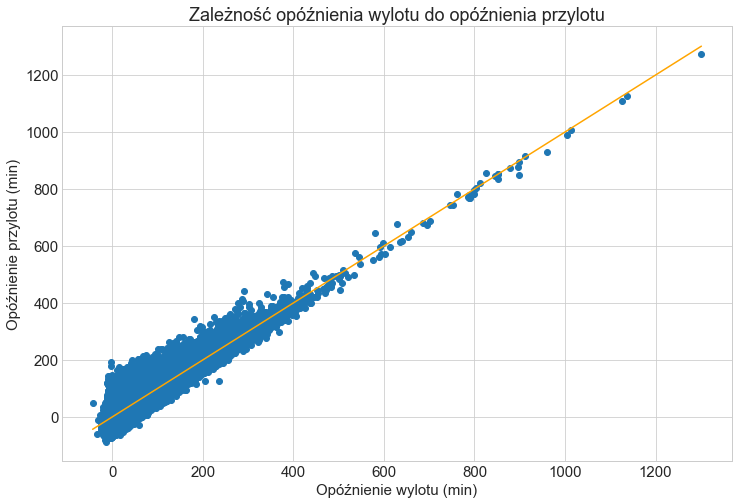

In [6]:
x = flights['dep_delay']
y = flights['arr_delay']

min_x = np.nanmin(x)
max_x = np.nanmax(x)

plt.plot(x, y, 'o')
# plt.scatter(x, y) # użycie zwykłego plot() jest bardziej optymalne, jeśli wszystkie punkty są jednakowej wielkości i koloru

plt.plot([min_x, max_x], [min_x, max_x], color='orange')
plt.title('Zależność opóźnienia wylotu do opóźnienia przylotu')
plt.xlabel('Opóźnienie wylotu (min)')
plt.ylabel('Opóźnienie przylotu (min)')

#### Zadanie 4

Przedstaw wykres bąbelkowy (bubble chart) zależności średniego opóźnienia przylotu od dystansu lotu:

- zaokrąglij dystans do setek mil (`np.round(value, decimals=-2)`)
- wielkość bąbelka uzależnij od ilości lotów
- ustaw półprzezroczystość bąbelków (parametr `alpha=0.5`)
- ogranicz wykres do obszarów o największej ilości danych

Podpowiedź: dane muszą być zagregowane wg dystansu.

(-10.0, 20.0)

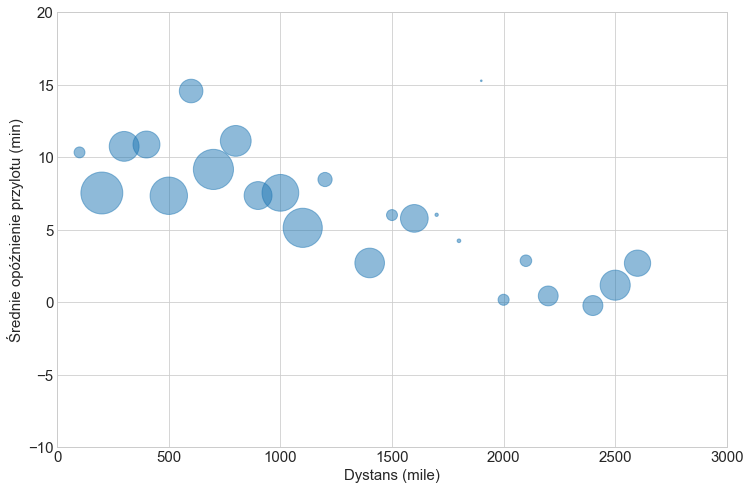

In [7]:
data = flights[['distance', 'arr_delay']].copy()
data['distance'] = np.round(data['distance'], decimals=-2)

groups = data.groupby('distance')
agg = groups.agg(['mean', 'count'])

agg.columns = agg.columns.droplevel()
agg = agg.reset_index()

plt.scatter(agg['distance'], agg['mean'], s=agg['count']/20, alpha=0.5)

plt.xlabel('Dystans (mile)')
plt.ylabel('Średnie opóźnienie przylotu (min)')
plt.xlim(0, 3000)
plt.ylim(-10, 20)

#### Zadanie 5

Zmodyfikuj wykres z zadania 4:

- ogranicz dane do linii lotniczych zawartych w poniższym dictionary kolorów
- wyświetl osobne bąbelki dla poszczególnych linii lotniczych i oznacz je kolorami

W pandas wartości `Series` (jednej kolumny danych) można przekształcić na inne wg klucz -> wartość z Dictionary, używając funkcji `map()`.

In [8]:
carrier_colors = {'UA': 'red', 'DL': 'blue', 'AA': 'green'}

(-10.0, 20.0)

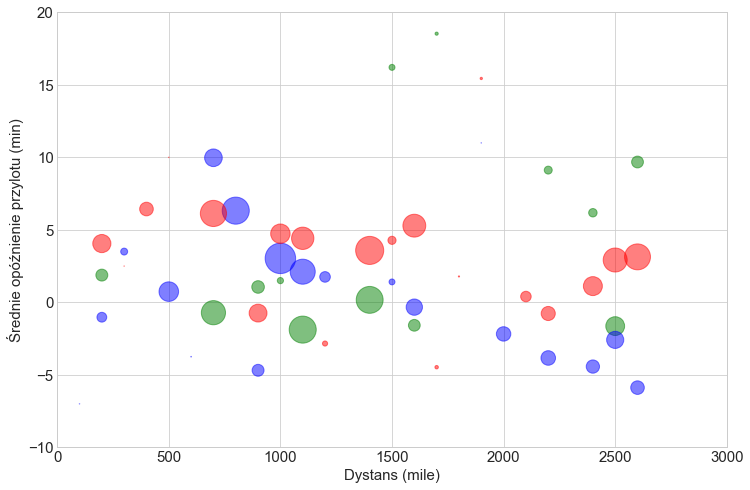

In [9]:
selected = flights[['carrier', 'distance', 'arr_delay']].copy()
selected = selected[selected['carrier'].isin(carrier_colors.keys())]
selected['distance'] = np.round(selected['distance'], decimals=-2)

groups = selected.groupby(['carrier', 'distance'])
agg = groups.agg(['mean', 'count'])

agg.columns = agg.columns.droplevel()
agg = agg.reset_index()

colors = agg['carrier'].map(carrier_colors)

plt.scatter(agg['distance'], agg['mean'], s=agg['count']/10, c=colors, alpha=0.5)

plt.xlabel('Dystans (mile)')
plt.ylabel('Średnie opóźnienie przylotu (min)')
plt.xlim(0, 3000)
plt.ylim(-10, 20)

#### Zadanie 6

Utwórz wykres słupkowy przedstawiający ilość wylotów w kolejnych godzinach dnia (0-23).

Text(0, 0.5, 'Ilość wylotów')

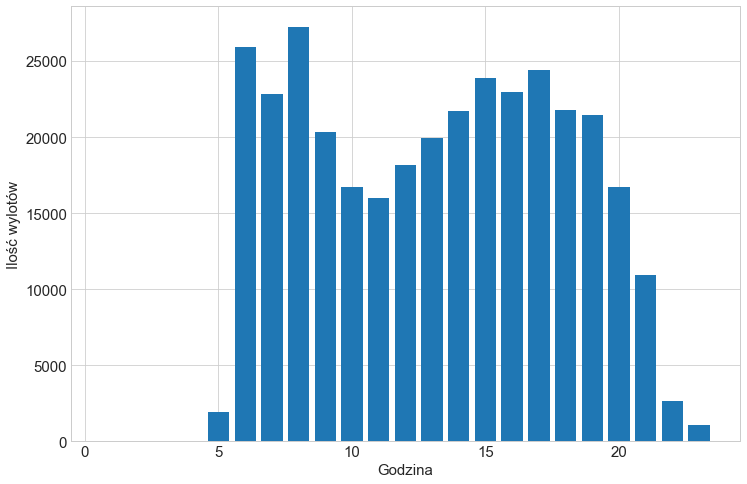

In [10]:
by_hour = flights[['hour', 'minute']].groupby('hour').count()
by_hour.columns=['count']

plt.bar(by_hour.index, by_hour['count'])
plt.xlabel('Godzina')
plt.ylabel('Ilość wylotów')

#### Zadanie 7

Przedstaw histogram wartości opóźnień przylotów i wylotów:

- dobierz zakres oraz ilość kubełków
- ustaw kolor wypełnienia (`facecolor`) i obramowania (`edgecolor`) oraz przezroczystość
- podpisz osie i nadaj tytuł
- wyświetl legendę
- dobierz ograniczenie przedziału wyświetlanych wartości (`range`) oraz ilość kubełków
- opcjonalnie - porównaj wyniki, jeśli odfiltrujesz wartości 0 (brak opóźnienia)

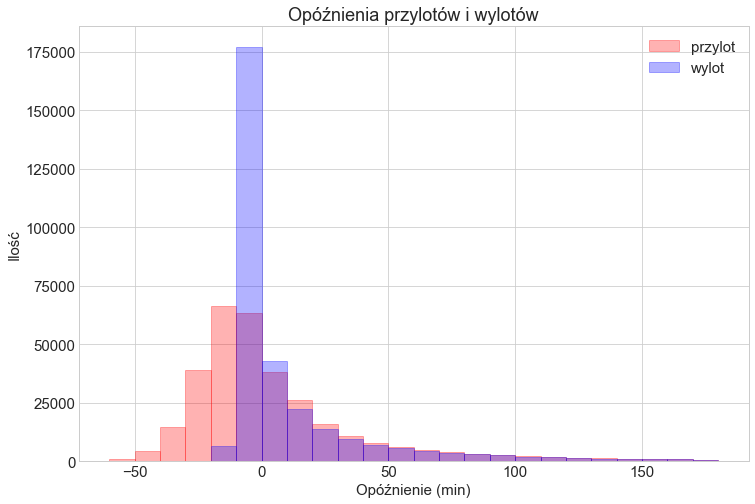

In [11]:
arr_delay = flights['arr_delay'][flights['arr_delay'] != 0]
dep_delay = flights['dep_delay'][flights['dep_delay'] != 0]

# 240 minut, kubełki po 10 minut
plt.hist(arr_delay, 24, facecolor='r', edgecolor='r', range=(-60, 180), alpha=0.3, label='przylot')
plt.hist(dep_delay, 24, facecolor='b', edgecolor='b', range=(-60, 180), alpha=0.3, label='wylot')

plt.title('Opóźnienia przylotów i wylotów')
plt.xlabel('Opóźnienie (min)')
plt.ylabel('Ilość')
plt.legend()

#### Zadanie 8

Lista `top_carriers` zawiera kody 5 linii lotniczych z największą ilością lotów.

Przedstaw rozkład opóźnień przylotów dla tych linii.

Podpowiedź: zamiana wyników grupowania `DataFrame` na `dict` nazwa grupy -> wartości:

```python
groups = data.groupby('nazwa_kolumny')
groups_dict = dict(list(groups))
```

In [12]:
top_carriers = list(flights.groupby('carrier').size().sort_values(ascending=False).head(5).index)
top_carriers

['UA', 'B6', 'EV', 'DL', 'AA']

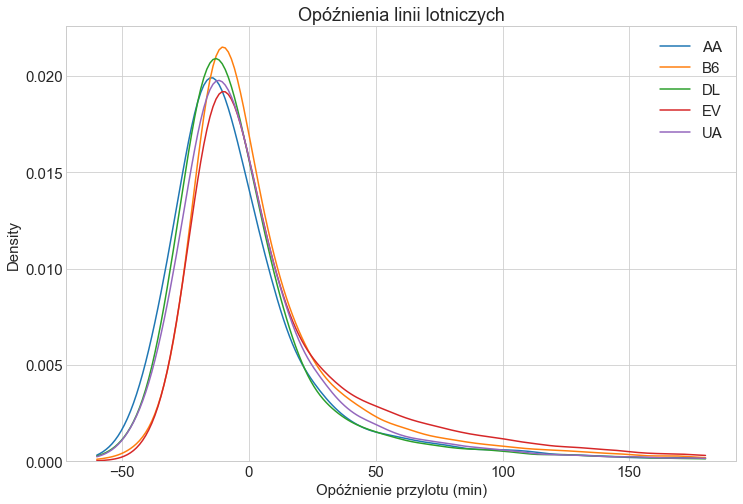

In [13]:
flights_by_airline = flights[flights['carrier'].isin(top_carriers)].groupby('carrier')
flights_by_airline = dict(list(flights_by_airline))

for airline in flights_by_airline:
    data = flights_by_airline[airline]['arr_delay']
    sns.kdeplot(data, clip=(-60, 180), label=airline)

plt.title('Opóźnienia linii lotniczych')
plt.xlabel('Opóźnienie przylotu (min)')
plt.legend()